<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-packages-and-data" data-toc-modified-id="Loading-packages-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading packages and data</a></span></li><li><span><a href="#Preparing-data-for-modelling" data-toc-modified-id="Preparing-data-for-modelling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparing data for modelling</a></span><ul class="toc-item"><li><span><a href="#Handle-null-values" data-toc-modified-id="Handle-null-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Handle null values</a></span></li><li><span><a href="#One-hot-encode-categorical-variables" data-toc-modified-id="One-hot-encode-categorical-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>One-hot encode categorical variables</a></span></li></ul></li><li><span><a href="#Train-Random-Forest-model,-with-timing-for-comparision-with-Python" data-toc-modified-id="Train-Random-Forest-model,-with-timing-for-comparision-with-Python-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train Random Forest model, with timing for comparision with Python</a></span><ul class="toc-item"><li><span><a href="#Split-the-dataset" data-toc-modified-id="Split-the-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Split the dataset</a></span></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fit the model</a></span></li><li><span><a href="#Importance-Plot" data-toc-modified-id="Importance-Plot-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Importance Plot</a></span></li></ul></li></ul></div>

# Loading packages and data

In [1]:
library(party)
library(randomForest)
library(caret)
library(tidyverse)
library(tictoc)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.5.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.2"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.0.1       v purrr   0.2.5  
v tidyr   0.8.1       v dplyr   0.8.0.1
v readr   1.1.1       v stringr 1.3.1  
v tibble  2.0.1       v forcats 0.3.0  
Warning message:
"package 'tibbl

In [2]:
df = read_csv('../datasets/credit.csv')

Parsed with column specification:
cols(
  `Loan ID` = col_character(),
  `Customer ID` = col_character(),
  `Loan Status` = col_character(),
  `Current Loan Amount` = col_integer(),
  Term = col_character(),
  `Credit Score` = col_integer(),
  `Annual Income` = col_integer(),
  `Years in current job` = col_character(),
  `Home Ownership` = col_character(),
  Purpose = col_character(),
  `Monthly Debt` = col_double(),
  `Years of Credit History` = col_double(),
  `Months since last delinquent` = col_integer(),
  `Number of Open Accounts` = col_integer(),
  `Number of Credit Problems` = col_integer(),
  `Current Credit Balance` = col_integer(),
  `Maximum Open Credit` = col_integer(),
  Bankruptcies = col_integer(),
  `Tax Liens` = col_integer()
)


Use `str()` and `summmary()` to take a glimpse at the variables and their data types.
**Compared to Python's `info()`:**
1. Gives you more information and overall sense of the data
2. `readr` (a package where you call `read_csv()` from) will type strings as char right away.
3. `str()` or `summmary()` give a richer overview of the dataset than `describe()`, in my own evaluation.

In [5]:
str(df)
# Str() is a powerful function that gives a more complete overview of the the language

Classes 'tbl_df', 'tbl' and 'data.frame':	100514 obs. of  19 variables:
 $ Loan ID                     : chr  "14dd8831-6af5-400b-83ec-68e61888a048" "4771cc26-131a-45db-b5aa-537ea4ba5342" "4eed4e6a-aa2f-4c91-8651-ce984ee8fb26" "77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a" ...
 $ Customer ID                 : chr  "981165ec-3274-42f5-a3b4-d104041a9ca9" "2de017a3-2e01-49cb-a581-08169e83be29" "5efb2b2b-bf11-4dfd-a572-3761a2694725" "e777faab-98ae-45af-9a86-7ce5b33b1011" ...
 $ Loan Status                 : chr  "Fully Paid" "Fully Paid" "Fully Paid" "Fully Paid" ...
 $ Current Loan Amount         : int  445412 262328 99999999 347666 176220 206602 217646 648714 548746 215952 ...
 $ Term                        : chr  "Short Term" "Short Term" "Short Term" "Long Term" ...
 $ Credit Score                : int  709 NA 741 721 NA 7290 730 NA 678 739 ...
 $ Annual Income               : int  1167493 NA 2231892 806949 NA 896857 1184194 NA 2559110 1454735 ...
 $ Years in current job        : chr  "8 years

# Preparing data for modelling

In [6]:
summary(df)

   Loan ID          Customer ID        Loan Status        Current Loan Amount
 Length:100514      Length:100514      Length:100514      Min.   :   10802   
 Class :character   Class :character   Class :character   1st Qu.:  179652   
 Mode  :character   Mode  :character   Mode  :character   Median :  312246   
                                                          Mean   :11760447   
                                                          3rd Qu.:  524942   
                                                          Max.   :99999999   
                                                          NA's   :514        
     Term            Credit Score   Annual Income       Years in current job
 Length:100514      Min.   : 585    Min.   :    76627   Length:100514       
 Class :character   1st Qu.: 705    1st Qu.:   848844   Class :character    
 Mode  :character   Median : 724    Median :  1174162   Mode  :character    
                    Mean   :1076    Mean   :  1378277               

## Handle null values

We find that many columns have fewer non-null entries than others, meaning that there are a number of null values to worry about. For the purpose of this demonstration, NaNs for months since delinquents, credit score, and income will be counted as zeros. The rest of NaNs will be dropped.

In [7]:
df['Annual Income'][is.na(df['Annual Income'])] <- 0
df['Credit Score'][is.na(df['Credit Score'])] <- 0
df['Years in current job'][is.na(df['Years in current job'])] <- 0
df['Months since last delinquent'][is.na(df['Months since last delinquent'])] <- 0
df <- na.omit(df)

Check how many rows are left. Seems good to go.

In [8]:
dim(df)

[1] 99794    19

In [9]:
df <- select(df,-`Loan ID`,-`Customer ID`) 

## One-hot encode categorical variables

In [10]:
# One hot code all categorical values 
dummy <- dummyVars("~ .", data = df,fullRank = TRUE, sep ="_")
df_new <- as.data.frame(predict(dummy, df))

In [11]:
head(df_new,2)

`Loan Status`Fully Paid,`Current Loan Amount`,TermShort Term,`Credit Score`,`Annual Income`,`Years in current job`1 year,`Years in current job`10+ years,`Years in current job`2 years,`Years in current job`3 years,`Years in current job`4 years,...,Purposewedding,`Monthly Debt`,`Years of Credit History`,`Months since last delinquent`,`Number of Open Accounts`,`Number of Credit Problems`,`Current Credit Balance`,`Maximum Open Credit`,Bankruptcies,`Tax Liens`
1,445412,1,709,1167493,0,0,0,0,0,...,0,5214.74,17.2,0,6,1,228190,416746,1,0
1,262328,1,0,0,0,1,0,0,0,...,0,33295.98,21.1,8,35,0,229976,850784,0,0


With R, the column names generated from `dummyVars()` are unexpected transformed. From our persona's perspective, a beginnger, this is an issue. Some simple replacements are needed.

In [12]:
colnames(df_new) <- gsub("`", "", colnames(df_new))
colnames(df_new) <- gsub("'", "", colnames(df_new))

In [13]:
# length(colnames(df_new))
colnames(df_new)

[1] "Loan StatusFully Paid"         "Current Loan Amount"          
 [3] "TermShort Term"                "Credit Score"                 
 [5] "Annual Income"                 "Years in current job1 year"   
 [7] "Years in current job10+ years" "Years in current job2 years"  
 [9] "Years in current job3 years"   "Years in current job4 years"  
[11] "Years in current job5 years"   "Years in current job6 years"  
[13] "Years in current job7 years"   "Years in current job8 years"  
[15] "Years in current job9 years"   "Years in current jobn/a"      
[17] "Home OwnershipHome Mortgage"   "Home OwnershipOwn Home"       
[19] "Home OwnershipRent"            "PurposeBuy a Car"             
[21] "PurposeBuy House"              "PurposeDebt Consolidation"    
[23] "PurposeEducational Expenses"   "PurposeHome Improvements"     
[25] "Purposemajor_purchase"         "PurposeMedical Bills"         
[27] "Purposemoving"                 "Purposeother"                 
[29] "PurposeOther"                  "Purposerenewable_energy"      
[31] "Purposesmall_business"         "PurposeTake a Trip"           
[33] "Purposevacation"               "Purposewedding"               
[35] "Monthly Debt"                  "Years of Credit History"      
[37] "Months since last delinquent"  "Number of Open Accounts"      
[39] "Number of Credit Problems"     "Current Credit Balance"       
[41] "Maximum Open Credit"           "Bankruptcies"                 
[43] "Tax Liens"

# Train Random Forest model, with timing for comparision with Python

**Key distinction:**

'Loan.StatusFully.Paid' is automatically kept as the one field.

R's dummyVars has automatically removed the 'ChargedOff' option (the negative) from the model.

With Python, one must remove the ChargedOff as it can mess with the model. 

## Split the dataset

In [14]:
set.seed(100)
train <- sample(nrow(df_new), 0.75*nrow(df_new), replace = FALSE)
TrainSet <- df_new[train,]
TestSet <- df_new[-train,]

In [15]:
train_labels <- as.factor(TrainSet[,"Loan StatusFully Paid"])
train_features <- select(TrainSet, -"Loan StatusFully Paid")

In [16]:
test_labels <- as.factor(TestSet[,"Loan StatusFully Paid"])
test_features <- select(TestSet, -"Loan StatusFully Paid")

## Fit the model
Clear explanation on specific package. For instance: paramaters.

In [30]:
tic()
rf <- randomForest(train_features,train_labels, ntree=200, importance=TRUE)
toc()

590.09 sec elapsed


That was very long...

In [31]:
print(rf)


Call:
 randomForest(x = train_features, y = train_labels, ntree = 200,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 6

        OOB estimate of  error rate: 17.92%
Confusion matrix:
     0     1 class.error
0 3891 12998  0.76961336
1  414 57542  0.00714335


Display the error to test how many trees should be ran

In [37]:
# plot(rf)
# # Have to find a way to do this in Python

In [38]:
# Predicting on train set
predTrain <- predict(rf, test_features, type = "class")
# Checking classification accuracy
table(predTrain, test_labels)  

         test_labels
predTrain     0     1
        0  1257    87
        1  4441 19164

In [39]:
# Checking classification accuracy
predValid <- predict(rf, test_features, type = "class")
print("The accuracy is: ")
mean(predValid == test_labels)                
table(predValid,test_labels)

[1] "The accuracy is: "


[1] 0.8185498

         test_labels
predValid     0     1
        0  1257    86
        1  4441 19165

## Importance Plot
R's `random forest` package gives a better context of the features/variables used in the training the algorithm.
Simple, intuitive included functions are also a plus for R compared to Python.

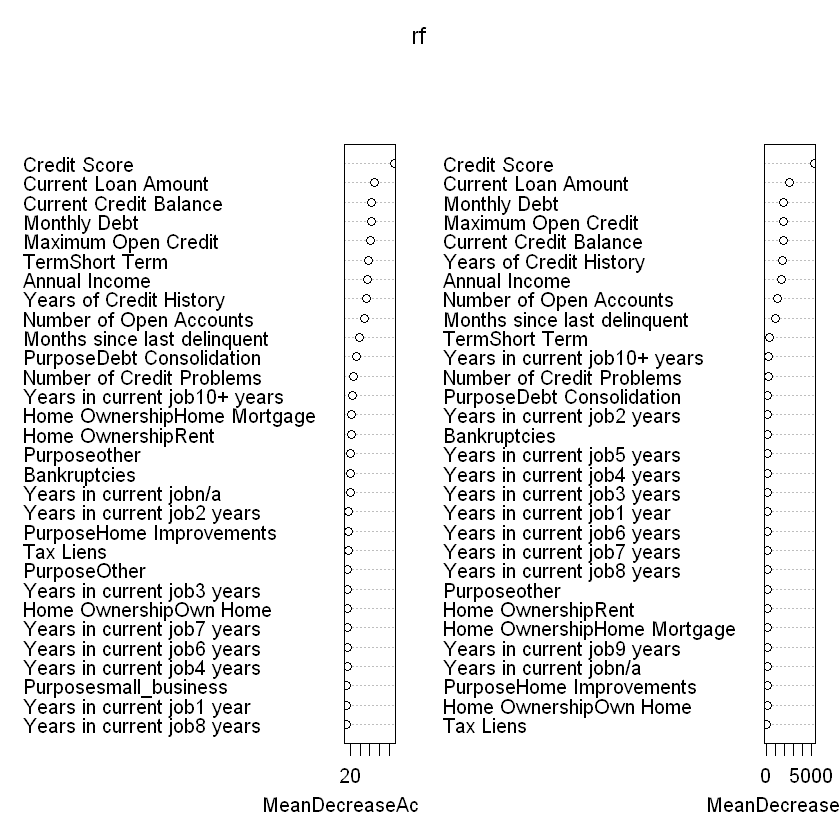

In [40]:
varImpPlot(rf)

# Importance of features in the model, represented by degree of accuracy lost if the feature is removed.